In [1]:
import os
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import SkyCoord

import subprocess
from tqdm import tqdm

In [2]:
df_all=pd.read_csv('../data/rv/stat_TOI1696_rel_202111.dat', sep='\s+', header=None)
df_yj=pd.read_csv('../data/rv/stat_TOI1696_rel_202111_yj.dat', sep='\s+', header=None)
df_h=pd.read_csv('../data/rv/stat_TOI1696_honly_rel_202201.dat', sep='\s+', header=None)
df_yj

,0,1,2,3,4,5,6,7,8,9
0,40952,37.79800,0.01623,40952,2.459245e+06,-23.059901,0.00176,0.00194,0.00087,1.399
1,49800,-11.61193,0.01350,49800,2.459467e+06,26.490993,-0.07777,-0.07037,-0.07830,1.899
2,50954,-9.26227,0.01424,50954,2.459488e+06,24.024074,-0.02351,-0.02079,-0.02358,1.619
3,51246,-5.13495,0.03639,51246,2.459503e+06,20.319288,-0.21377,-0.20164,-0.21090,1.548
4,51252,-5.08602,0.03903,51252,2.459503e+06,20.056578,-0.20616,-0.19399,-0.20375,1.144
5,51852,-3.90510,0.01874,51852,2.459508e+06,18.764927,-0.24670,-0.23403,-0.24379,1.512
6,51864,-3.61436,0.01405,51864,2.459508e+06,18.467185,-0.24586,-0.22734,-0.24140,1.147
7,52480,-3.24096,0.01895,52480,2.459510e+06,18.138292,-0.21938,-0.20220,-0.21673,1.665
8,52494,-2.97022,0.01487,52494,2.459510e+06,17.807326,-0.21927,-0.20936,-0.21426,1.147
9,53058,-1.55725,0.01701,53058,2.459515e+06,16.329037,-0.04850,-0.04493,-0.04738,1.374


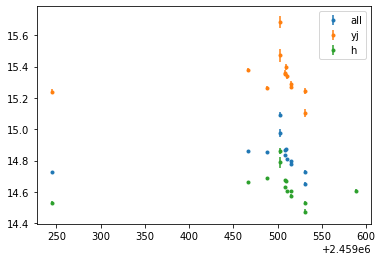

In [3]:
offset =[0, 0.5, 2]
lbls = ['all', 'yj', 'h']

for i, df in enumerate([df_all, df_yj, df_h]):

    time = df[4]  #JD_UTC
    rv = df[1]+  df[5]  #relative rv[km/s]
    rv_err = df[2]

    pl.errorbar(time, rv+offset[i], rv_err, fmt='.', label=lbls[i])

pl.legend()

### JD_UTC to BJD

In [4]:
np.array(time)
#np.savetxt('TOI1696_GJD.txt', np.array(time), delimiter='\n', fmt='%.8f')

array([2459244.8812246, 2459466.9778762, 2459487.9479492, 2459502.9160709,
       2459503.052653 , 2459507.907617 , 2459508.0575233, 2459509.8824794,
       2459510.0527561, 2459514.9129145, 2459515.1112642, 2459530.8322767,
       2459531.0075395, 2459588.7141355])

In [5]:
BJD=[2459244.884701762, 2459466.979110371, 2459487.950952001, 2459502.920176458,\
     2459503.056767710, 2459507.912044662, 2459508.061960230, 2459509.887027196,\
     2459510.057314052, 2459514.917748312, 2459515.116108679, 2459530.837803917, 2459531.013072405]
df_all['BJD']=BJD
df_yj['BJD']=BJD

In [6]:
df = df_h
time = df[4] 
np.array(time)
#np.savetxt('TOI1696_GJD.txt', np.array(time), delimiter='\n', fmt='%.8f')

array([2459244.8812246, 2459466.9778762, 2459487.9479492, 2459502.9160709,
       2459503.052653 , 2459507.907617 , 2459508.0575233, 2459509.8824794,
       2459510.0527561, 2459514.9129145, 2459515.1112642, 2459530.8322767,
       2459531.0075395, 2459588.7141355])

In [7]:
BJD_h=[2459244.884701768, 2459466.979110366, 2459487.950951999, 2459502.920176457, 2459503.056767709,\
       2459507.912044661, 2459508.061960230, 2459509.887027195, 2459510.057314052, 2459514.917748312,\
       2459515.116108679, 2459530.837803919, 2459531.013072406, 2459588.719005262]
df_h['BJD']=BJD_h

- telluricがきれいにとりのぞけていない RVに影響
- 石川さんの解析には関係なさげ  石川さんへの連絡は成田さんからやってもらう
- logを見て天気、AOは悪いデータはのぞく photon-weightedの観測中心時刻が露光中心とずれる 1分ずれると地球運動の補正が5mくらい間違える

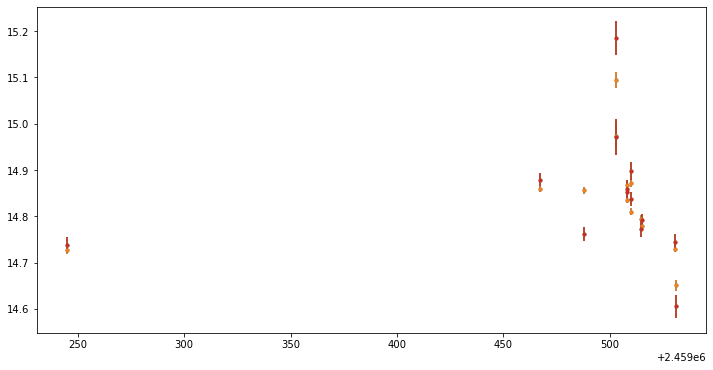

In [8]:
pl.figure(figsize=(12,6))

for df in [df_all, df_yj]:

    utc = df[4]
    bjd = df['BJD'] 
    rv = df[1]+  df[5]  #relative rv[km/s]
    rv_err = df[2]

    pl.errorbar(bjd, rv, rv_err, fmt='.')
    pl.errorbar(utc, rv, rv_err, fmt='.')

### remove data points with large systematic noise

天気の悪い日を確認

<ErrorbarContainer object of 3 artists>

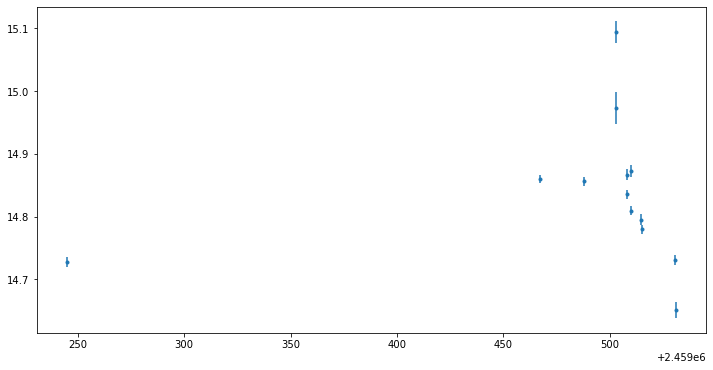

In [9]:
pl.figure(figsize=(12,6))
df = df_all

bjd = df['BJD'] 
rv = df[1]+  df[5]  #relative rv[km/s]
rv_err = df[2]

pl.errorbar(bjd, rv, rv_err, fmt='.')


In [10]:
date_time=['2021-01-29 22:53', '2021-09-08 25:13', '2021-09-29 24:30', '2021-10-14 23:44', '2021-10-14 27:00',\
          '2021-10-19 23:31', '2021-10-19 27:07', '2021-10-21 22:56', '2021-10-21 27:00',\
          '2021-10-26 23:39', '2021-10-26 28:25','2021-11-11 21:43', '2021-11-11 25:55']
memo = ['32.9', '30.3, cloud passage', '>31.2', 'instrument trouble', 'useless',\
       '29.0', '34.3', '27.2', '34.5', '29.9', '37.6', '28.6', '22.0, cloud passage']
caution_flag = [0, 1, 0, 0.5, 1, 0, 0, 0, 0, 0, 0, 0, 1]

df_all['date_time']=date_time
df_yj['date_time']=date_time

df_all['memo']=memo
df_yj['memo']=memo

df_all['caution_flag']=caution_flag
df_yj['caution_flag']=caution_flag

df_all

,0,1,2,3,4,5,6,7,8,9,BJD,date_time,memo,caution_flag
0,40952,37.78741,0.00817,40952,2.459245e+06,-23.059901,0.00176,0.00194,0.00087,1.399,2.459245e+06,2021-01-29 22:53,32.9,0.0
1,49800,-11.63099,0.00701,49800,2.459467e+06,26.490993,-0.07777,-0.07037,-0.07830,1.899,2.459467e+06,2021-09-08 25:13,"30.3, cloud passage",1.0
2,50954,-9.16800,0.00702,50954,2.459488e+06,24.024074,-0.02351,-0.02079,-0.02358,1.619,2.459488e+06,2021-09-29 24:30,>31.2,0.0
3,51246,-5.22509,0.01689,51246,2.459503e+06,20.319288,-0.21377,-0.20164,-0.21090,1.548,2.459503e+06,2021-10-14 23:44,instrument trouble,0.5
4,51252,-5.08293,0.02543,51252,2.459503e+06,20.056578,-0.20616,-0.19399,-0.20375,1.144,2.459503e+06,2021-10-14 27:00,useless,1.0
5,51852,-3.89811,0.00929,51852,2.459508e+06,18.764927,-0.24670,-0.23403,-0.24379,1.512,2.459508e+06,2021-10-19 23:31,29.0,0.0
6,51864,-3.63186,0.00704,51864,2.459508e+06,18.467185,-0.24586,-0.22734,-0.24140,1.147,2.459508e+06,2021-10-19 27:07,34.3,0.0
7,52480,-3.26557,0.00891,52480,2.459510e+06,18.138292,-0.21938,-0.20220,-0.21673,1.665,2.459510e+06,2021-10-21 22:56,27.2,0.0
8,52494,-2.99783,0.00732,52494,2.459510e+06,17.807326,-0.21927,-0.20936,-0.21426,1.147,2.459510e+06,2021-10-21 27:00,34.5,0.0
9,53058,-1.53390,0.00818,53058,2.459515e+06,16.329037,-0.04850,-0.04493,-0.04738,1.374,2.459515e+06,2021-10-26 23:39,29.9,0.0


In [11]:
date_time_h=['2021-01-29 22:53', '2021-09-08 25:13', '2021-09-29 24:30', '2021-10-14 23:44', '2021-10-14 27:00',\
          '2021-10-19 23:31', '2021-10-19 27:07', '2021-10-21 22:56', '2021-10-21 27:00',\
          '2021-10-26 23:39', '2021-10-26 28:25','2021-11-11 21:43', '2021-11-11 25:55', '2022-01-08 18:53']
memo_h = ['32.9', '30.3, cloud passage', '>31.2', 'instrument trouble', 'useless',\
       '29.0', '34.3', '27.2', '34.5', '29.9', '37.6', '28.6', '22.0, cloud passage', '71']
caution_flag_h = [0, 1, 0, 0.5, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]

df_h['date_time']=date_time_h

df_h['memo']=memo_h

df_h['caution_flag']=caution_flag_h

df_h

,0,1,2,3,4,5,6,7,8,9,BJD,date_time,memo,caution_flag
0,40952,35.59164,0.00961,40952,2.459245e+06,-23.059901,0.00176,0.00194,0.00087,1.399,2.459245e+06,2021-01-29 22:53,32.9,0.0
1,49800,-13.82789,0.00831,49800,2.459467e+06,26.490993,-0.07777,-0.07037,-0.07830,1.899,2.459467e+06,2021-09-08 25:13,"30.3, cloud passage",1.0
2,50954,-11.33729,0.00817,50954,2.459488e+06,24.024074,-0.02351,-0.02079,-0.02358,1.619,2.459488e+06,2021-09-29 24:30,>31.2,0.0
3,51246,-7.45636,0.01928,51246,2.459503e+06,20.319288,-0.21377,-0.20164,-0.21090,1.548,2.459503e+06,2021-10-14 23:44,instrument trouble,0.5
4,51252,-7.26826,0.03348,51252,2.459503e+06,20.056578,-0.20616,-0.19399,-0.20375,1.144,2.459503e+06,2021-10-14 27:00,useless,1.0
5,51852,-6.09131,0.01087,51852,2.459508e+06,18.764927,-0.24670,-0.23403,-0.24379,1.512,2.459508e+06,2021-10-19 23:31,29.0,0.0
6,51864,-5.83424,0.00823,51864,2.459508e+06,18.467185,-0.24586,-0.22734,-0.24140,1.147,2.459508e+06,2021-10-19 27:07,34.3,0.0
7,52480,-5.46935,0.01018,52480,2.459510e+06,18.138292,-0.21938,-0.20220,-0.21673,1.665,2.459510e+06,2021-10-21 22:56,27.2,0.0
8,52494,-5.20186,0.00854,52494,2.459510e+06,17.807326,-0.21927,-0.20936,-0.21426,1.147,2.459510e+06,2021-10-21 27:00,34.5,0.0
9,53058,-3.72362,0.00939,53058,2.459515e+06,16.329037,-0.04850,-0.04493,-0.04738,1.374,2.459515e+06,2021-10-26 23:39,29.9,0.0


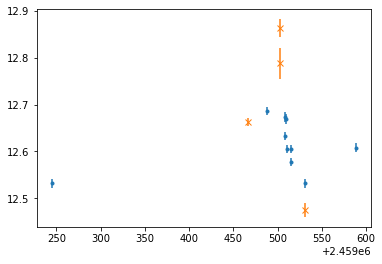

In [12]:
df_valid = df_h[df_h['caution_flag']<0.5]
df_cut = df_h[df_h['caution_flag']>=0.5]

for df, mark, col in zip([df_valid, df_cut], ['.','x'], ['b', 'r']):
    bjd = df['BJD']
    rv = df[1]+  df[5]  #relative rv[km/s]
    rv_err = df[2]
    pl.errorbar(bjd, rv, rv_err, fmt=mark, label=col)

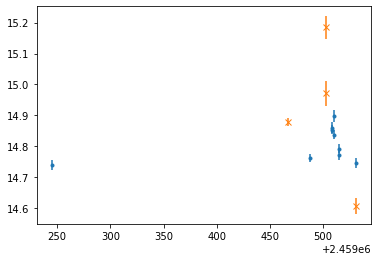

In [13]:
df_valid = df_yj[df_yj['caution_flag']<0.5]
df_cut = df_yj[df_yj['caution_flag']>=0.5]

for df, mark, col in zip([df_valid, df_cut], ['.','x'], ['b', 'r']):
    bjd = df['BJD']
    rv = df[1]+  df[5]  #relative rv[km/s]
    rv_err = df[2]
    pl.errorbar(bjd, rv, rv_err, fmt=mark, label=col)

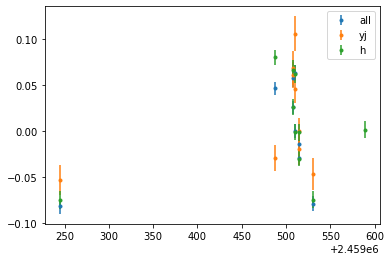

In [16]:
for df, lb in zip([df_all, df_yj, df_h], lbls):
    df = df[df['caution_flag']<0.5]
    
    bjd = df['BJD']
    rv = df[1]+  df[5]  #relative rv[km/s]
    
    rv_err = df[2]

    pl.errorbar(bjd, rv-np.median(rv), rv_err, fmt='.', label=lb)
    

pl.legend()

In [17]:
df = df_h
df = df[df['caution_flag']<0.5]

bjd = df['BJD']
rv = df[1]+  df[5]  #relative rv[km/s]
rv_err = df[2]


df_save = pd.DataFrame({'bjd':bjd, 'rv':rv, 'rv_err':rv_err})

df_save.to_csv('TOI1696_rv_h_new.dat',sep=',', index=False)

In [18]:
df = df_yj
df = df[df['caution_flag']<0.5]

bjd = df['BJD']
rv = df[1]+  df[5]  #relative rv[km/s]
rv_err = df[2]


df_save = pd.DataFrame({'bjd':bjd, 'rv':rv, 'rv_err':rv_err})

df_save.to_csv('TOI1696_rv_yj_new.dat',sep=',', index=False)

In [19]:
df = df_all
df = df[df['caution_flag']<0.5]

bjd = df['BJD']
rv = df[1]+  df[5]  #relative rv[km/s]
rv_err = df[2]


df_save = pd.DataFrame({'bjd':bjd, 'rv':rv-np.median(rv), 'rv_err':rv_err})

df_save.to_csv('TOI1696_rv_all_new.dat',sep=',', index=False)

### RV fit

In [59]:
!pip install allesfitter 

     |████████████████████████████████| 1.2 MB 16.5 MB/s eta 0:00:01     |█████████████████████████       | 972 kB 16.5 MB/s eta 0:00:01
